### Introduction

The objective of this US is to read a files that have data about parks, the first file is "water_consumption_updated.csv", in which has the water consumption of each park, and the second file contrains the area of those same parks.
Using the data from both files it is expected to then predict the monthly water consumption of a new park with 55 hectares.
For the calculus of the water consumption we used:
$$
\text{Water Consumption} = 
\begin{cases} 
\text{Consumption} \times 0.7 & \text{if Consumption} \leq 1000 \\
(1000 \times 0.7) + ((\text{Consumption} - 1000) \times 0.7 \times 0.15) \text{     } & \text{if } 1000 \leq \text{Consumption}
\end{cases}
$$

Then applying the linear regression, where x is the park area and y is the water cost:
$$
y = \text{intercept} + (\text{slope} \times x)
$$

The slope (m):
$$
m = \frac{n \left( \sum x^2 \right) - \left( \sum x \right)^2}{n \left( \sum xy \right) - \left( \sum x \right) \left( \sum y \right)}
$$

The intercept (b):
$$
b = \frac{n \sum y - m \left( \sum x \right)}{n}
$$

The R²:
$$
R^2 = \left( \frac{[n \left( \sum x^2 \right) - \left( \sum x \right)^2] [n \left( \sum y^2 \right) - \left( \sum y \right)^2]}{n \left( \sum xy \right) - \left( \sum x \right) \left( \sum y \right)} \right)^2
$$

The standard error:
$$
\text{standard error} = \sqrt{\frac{\sum \left( y_i - (\text{intercept} + \text{slope} \times x_i) \right)^2}{n-2} \times \frac{1}{\sum (x_i - \bar{x})^2}}
$$

Now to predict the new area consumption where x is the new park area:
$$
\text{predicted cost} = \text{intercept} + (\text{slope} \times x_{\text{new}})
$$

Confidence interval for prediction
The standard error of the prediction:
$$
\text{SE}_{\text{prediction}} = \text{standard error} \times \sqrt{1 + \frac{1}{n} + \frac{\sum (x_i - \bar{x})^2}{(x_{\text{new}} - \bar{x})^2}}
$$

To finish the confidence interval of 95% is calculated:
$$
\text{CI}_{\text{lower}} = \text{predicted\_cost} - t_{\text{value}} \times \text{SE}_{\text{prediction}}
$$

$$
\text{CI}_{\text{upper}} = \text{predicted\_cost} + t_{\text{value}} \times \text{SE}_{\text{prediction}}
$$

Slope: 1.812
Intercept: 2216.333
R-squared: 0.373
P-value: 0.582
Standard Error: 2.351
Predicted monthly cost for a 55-hectare park: 2315.986€
95% confidence interval for the predicted monthly cost: (2255.957, 2376.015)€


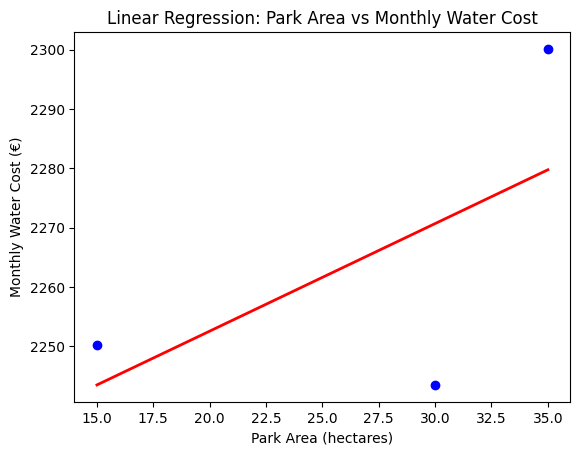

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

WTPRC_1000M3 = 0.7
WTCONSUPTIONUPTO = 1000
WTPRC_FEE = 0.15

waterData = pd.read_csv('water_consumption_updated.csv', sep=";")
areaData = pd.read_csv('Area.csv', sep=";")

areaData.columns = ['Park', 'Area']

mergedData = pd.merge(waterData, areaData, on='Park')

mergedData['Consumption'] = mergedData['Consumption'].str.replace(',', '.').astype(float)

monthlyConsumption = mergedData.groupby('Park')['Consumption'].sum()

def calculateCost(Consumption):
    if Consumption <= WTCONSUPTIONUPTO:
        return Consumption * WTPRC_1000M3
    else:
        return (WTCONSUPTIONUPTO * WTPRC_1000M3) + ((Consumption - WTCONSUPTIONUPTO) * WTPRC_1000M3 * WTPRC_FEE)

monthlyCost = monthlyConsumption.apply(calculateCost)

costData = pd.DataFrame({
    'Park': monthlyCost.index,
    'Month': monthlyCost.values
})

finalData = pd.merge(areaData, costData, on='Park')

finalData = finalData[pd.to_numeric(finalData['Area'], errors='coerce').notnull()]
finalData = finalData[pd.to_numeric(finalData['Month'], errors='coerce').notnull()]

x = finalData['Area'].astype(float)
y = finalData['Month'].astype(float)

slope, intercept, rValue, pValue, stdErr = stats.linregress(x, y)

print(f'Slope: {slope:.3f}')
print(f'Intercept: {intercept:.3f}')
print(f'R-squared: {rValue**2:.3f}')
print(f'P-value: {pValue:.3f}')
print(f'Standard Error: {stdErr:.3f}')

newParkArea = 55
predictedCost = intercept + slope * newParkArea
print(f'Predicted monthly cost for a 55-hectare park: {predictedCost:.3f}€')

n = len(x)
meanX = np.mean(x)
tValue = stats.t.ppf(0.975, df=n-2)
sePrediction = stdErr * np.sqrt(1/n + ((newParkArea - meanX)**2) / np.sum((x - meanX)**2))

ciLower = predictedCost - tValue * sePrediction
ciUpper = predictedCost + tValue * sePrediction

print(f'95% confidence interval for the predicted monthly cost: ({ciLower:.3f}, {ciUpper:.3f})€')

plt.scatter(x, y, color='blue')
plt.plot(x, intercept + slope * x, color='red', linewidth=2)
plt.xlabel('Park Area (hectares)')
plt.ylabel('Monthly Water Cost (€)')
plt.title('Linear Regression: Park Area vs Monthly Water Cost')
plt.show()

### Conclusion
In sumary from the results we get we can conclude that:

1) The slope indicates that for each additional hectare of park area, the monthly water cost increases by that amount.

2) The intercept indicates that even with 0 hectares of area it still has a baseline of that amount.

3) The R-squared indicates that amount multiplied by 100 results on the variability in the monthly water cost can be explained by the park area.

4) The P-value indicates that the relationship between park area and monthly water cost is not statistically significant.

5) The standard error indicates that the average distance that the observed values fall from the regression line.

6) The predicted monthly cost for 55 hectare park indicates the predicted amount of the cost of the park calculated by using linear regression.

7) The confidence interval indicates a range within which the true cost is likely to fall 95% of the time.

From these results we can confirm it's viability, since the predicted monthly cost (2315.986€) is indeed in the confidence interval calculated (2255.957, 2376.015).

### Introduction

The objective of this US is to determine the best line that fits the data by using polynomial regression.

The prediction function in linear regression for polynomial features is expressed as a weighted sum of the polynomial terms.
For a polynomial of degree d, the prediction function is:
$$
y = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_d x^d
$$

The mean squared error is a measure of how well the model's predictions match the actual data:
$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

To determine the best-fitting polynomial degree, we try different degrees (for example, from 1 to 5) and compute the MSE for each degree:
$$
\text{MSE}(d) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i(d))^2
$$

Degree: 1, MSE: 3.3751
Degree: 2, MSE: 0.0228
Degree: 3, MSE: 0.0227
Degree: 4, MSE: 0.0202
Degree: 5, MSE: 0.0197
The best-fitting polynomial degree is 5 with MSE 0.0197


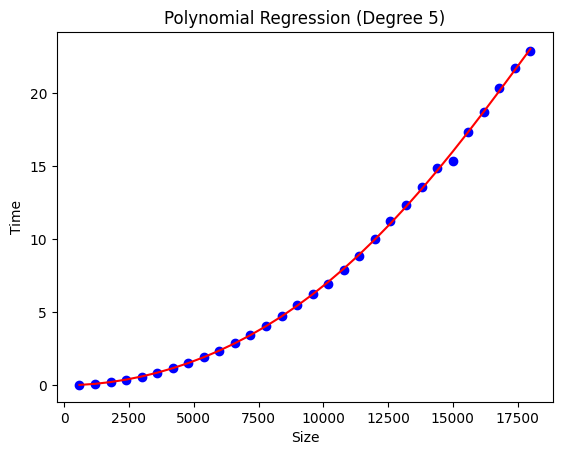

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

data = pd.read_csv('solution_us14.csv', sep=";")

data['size'] = data['size'].astype(str).str.replace(',', '.').astype(float)
data['time'] = data['time'].astype(str).str.replace(',', '.').astype(float)

X = data['size'].values.reshape(-1, 1)
y = data['time'].values

degrees = [1, 2, 3, 4, 5]
bestDegree = 0
bestMse = float('inf')
bestModel = None

for degree in degrees:
    polynomialFeatures = PolynomialFeatures(degree=degree)
    xPoly = polynomialFeatures.fit_transform(X)
    
    model = LinearRegression()
    model.fit(xPoly, y)
    
    yPred = model.predict(xPoly)
    mse = mean_squared_error(y, yPred)
    
    print(f'Degree: {degree}, MSE: {mse:.4f}')
    
    if mse < bestMse:
        bestMse = mse
        bestDegree = degree
        bestModel = model

polynomialFeatures = PolynomialFeatures(degree=bestDegree)
xPoly = polynomialFeatures.fit_transform(X)
yPred = bestModel.predict(xPoly)

print(f'The best-fitting polynomial degree is {bestDegree} with MSE {bestMse:.4f}')
plt.scatter(X, y, color='blue')
plt.plot(X, yPred, color='red')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title(f'Polynomial Regression (Degree {bestDegree})')
plt.show()

### Conclusion

To finish what we can conclude from the results is:
1) The lower the MSE (Mean Squared Error) the better fitting polynomial degree.
2) The higher the polynomial degree the more accurate is the prediction.